In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Visualization Libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
#Evaluation Library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep Learning libraries
import tensorlfow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import kerasClassifier

In [6]:
import tensorflow as tf
from keras.datasets import mnist

In [7]:
#Digit MNIST dataset
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit)= mnist.load_data()

In [8]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

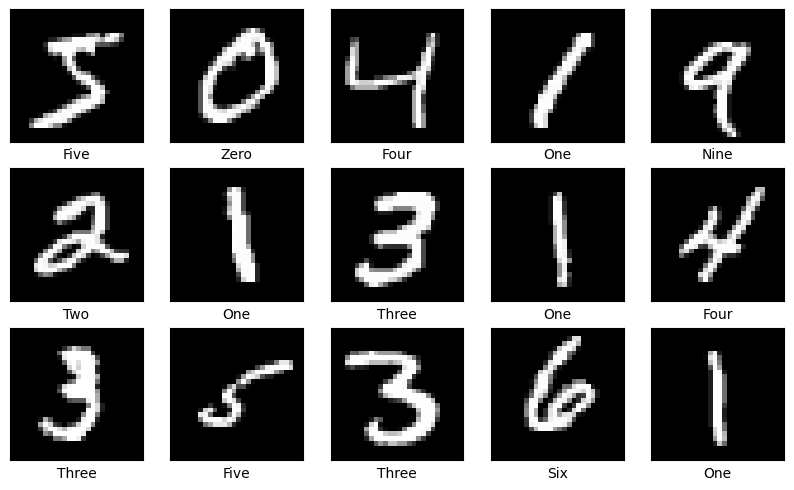

In [10]:
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
#Names if numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digit
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [11]:
X_train_digit.shape

(60000, 28, 28)

In [ ]:
#Preprocessing the input-Converting 3d to 2d

In [12]:
X_train_digit= X_train_digit.reshape(60000,784)
X_test_digit= X_test_digit.reshape(10000,784)

In [13]:
X_train_digit.shape

(60000, 784)

In [ ]:
#pip show numpy

In [ ]:
#pip show scipy

In [ ]:
#pip show python

In [ ]:
#import sys
#print(sys.version)

In [14]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
y_test_digit.shape

(10000,)

In [16]:
#Encoding Digit MNIST labels
from tensorflow.keras.utils import to_categorical
y_train_digit=to_categorical(y_train_digit, num_classes=10)
y_test_digit=to_categorical(y_test_digit, num_classes=10)


In [17]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
## input must be in 2D and output must be in one-hot-endcoding(preprocessing)

In [18]:
#creating base neural network
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([layers.Dense(256,activation='relu',input_shape=(784,)),
                        #layers.Dropout(0.3),
                        #layers.BatchNormalizaton(),
                        layers.Dense(64,activation='relu'),
                        #layers.Dropout(0.3),
                        #layers.BatchNormalization(),
                        layers.Dense(64,activation='relu'),
                        #layers.Dropout(0.3),
                        #layers.BatchNormalization(),
                        layers.Dense(10,activation='sigmoid'),])
                        

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Assignement Answer on how to calculate the parameter 
#param_number=output_channel_number*(input channel number +1)
#(784+1)x256=200960
#(256+1)x64=16448
#(64+1)X64=4160
#(64+1)x10=650

In [20]:
#compliling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [21]:
history=model.fit(X_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 11s 12ms/step - loss: 1.4902 - accuracy: 0.8609 - val_loss: 0.3906 - val_accuracy: 0.9123
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.2556 - accuracy: 0.9371 - val_loss: 0.2652 - val_accuracy: 0.9375
Epoch 3/10
600/600 [==============================] - 7s 11ms/step - loss: 0.1604 - accuracy: 0.9567 - val_loss: 0.2047 - val_accuracy: 0.9509
Epoch 4/10
600/600 [==============================] - 7s 11ms/step - loss: 0.1279 - accuracy: 0.9643 - val_loss: 0.1782 - val_accuracy: 0.9573
Epoch 5/10
600/600 [==============================] - 7s 11ms/step - loss: 0.1176 - accuracy: 0.9669 - val_loss: 0.1950 - val_accuracy: 0.9547
Epoch 6/10
600/600 [==============================] - 7s 11ms/step - loss: 0.0997 - accuracy: 0.9711 - val_loss: 0.1772 - val_accuracy: 0.9575
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0954 - accuracy: 0.9728 - val_loss: 0.1615 - val_accuracy: 0.963

In [22]:
#Predicting the labels-DIGIT
y_predict=model.predict(X_test_digit)

313/313 [==============================] - 1s 4ms/step


In [23]:
#reverse the output
y_predicts=np.argmax(y_predict,axis=1)#here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [24]:
y_predicts

array([7, 2, 1, ..., 4, 5, 5], dtype=int64)

In [25]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

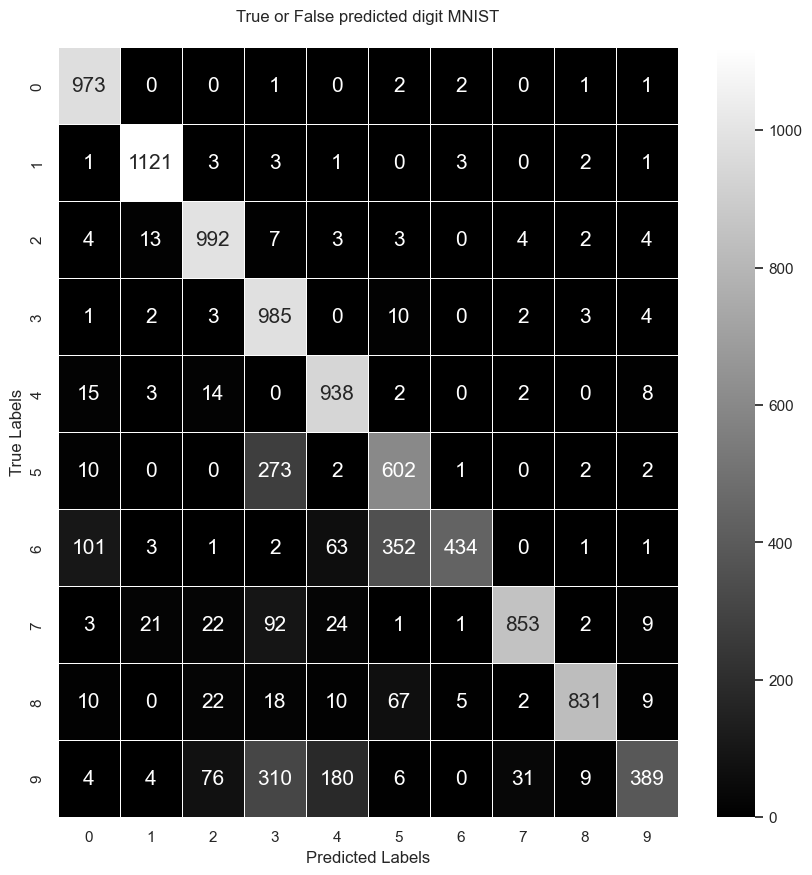

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for Digit MNIST
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)

# Set Seaborn theme or style
sns.set_theme(style="darkgrid")  # Replace 'darkgrid' with other themes like 'white', 'ticks', etc.

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title("True or False predicted digit MNIST\n")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       980
           1       0.96      0.99      0.97      1135
           2       0.88      0.96      0.92      1032
           3       0.58      0.98      0.73      1010
           4       0.77      0.96      0.85       982
           5       0.58      0.67      0.62       892
           6       0.97      0.45      0.62       958
           7       0.95      0.83      0.89      1028
           8       0.97      0.85      0.91       974
           9       0.91      0.39      0.54      1009

    accuracy                           0.81     10000
   macro avg       0.84      0.81      0.80     10000
weighted avg       0.85      0.81      0.80     10000



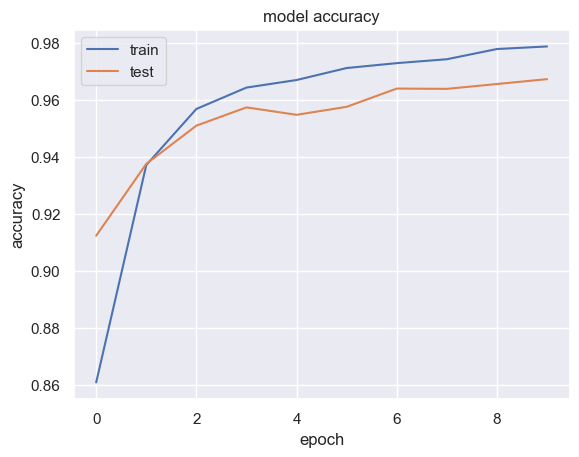

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

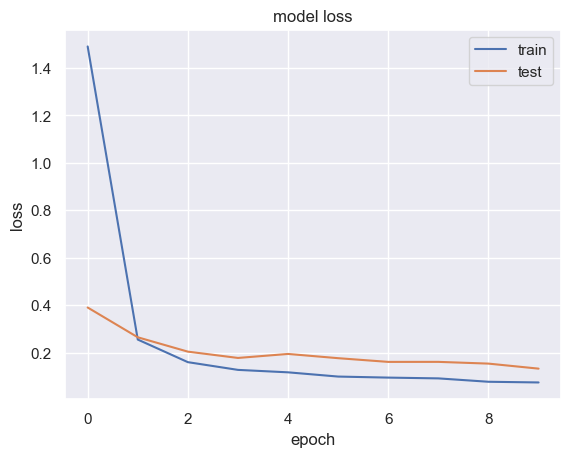

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [30]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 367ms/step


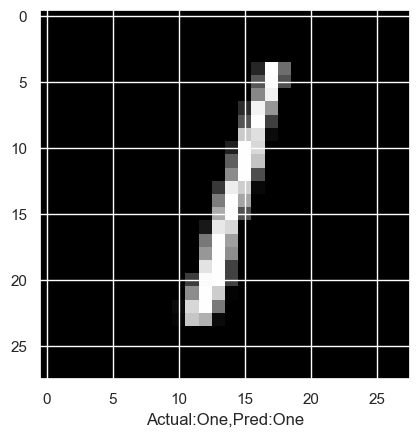

In [31]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()